# Coursework 2: k-means clustering
In this coursework, you will implement and test an unsupervised machine learning algorithm: _k-means clustering_. Once you have completed your work, you will need to submit the results on QM+. To submit your work, first download/export your Jupyter notebook as PDF. Then upload the PDF file in the submission area on QM+.

## Reading

As first step, familiarise yourself with k-means clustering, for example by working through https://en.wikipedia.org/wiki/K-means_clustering.

## Task 1: Prepare two test datasets
Pick a small set of values that enable you to apply clustering using pen&paper. Next create a fresh, or find an existing, large dataset. You may choose to use the Iris dataset, which is included in scikit-learn (and also available as a CSV file on QM+, generated using the below code snippet).
> Marking information: Up to 10 points: clarify why you believe your small dataset to be suitable for k-means clustering. Also make sure you report the source of your large dataset. 

In [1]:
# !pip install pytest-cov
# !pip install coverage

In [2]:
# not necessary on EECS Jupyterlab systems
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

## Small dataset for clustering

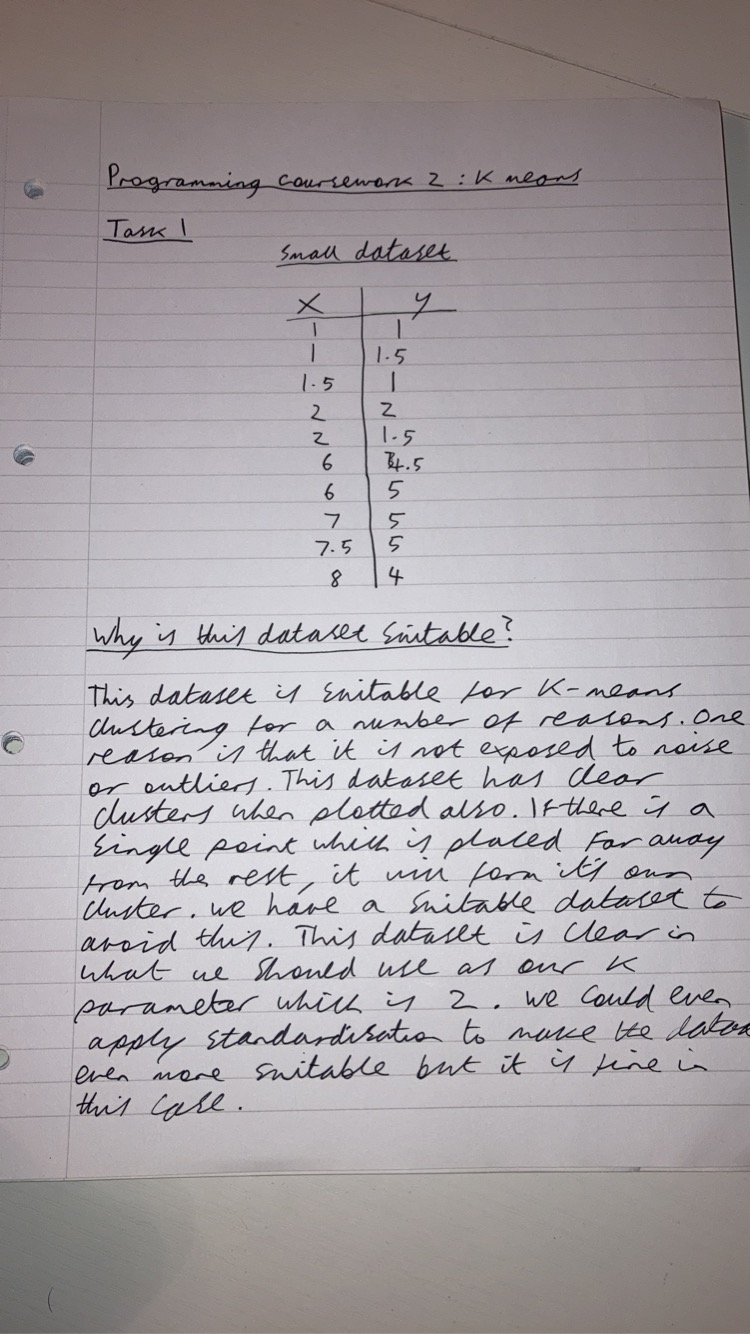

## Source of large dataset

The source of my large dataset is the well known Iris dataset which we import from SK learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html. I have dropped the sepal length and width columns so this makes the dataset less complex and more clear. We will use K means clustering on the petal length and petal width to identify which cluster each type of feature belongs to.

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from timeit import default_timer as timer
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')
%matplotlib inline

iris = pd.read_csv('iris.csv')
iris = iris.drop(['sepal length (cm)','sepal width (cm)'], axis=1)

iris

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


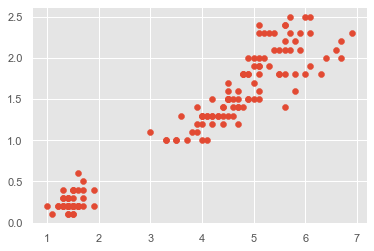

In [4]:
plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'])

## Task 2: Apply k-means clustering on paper
Work through your small dataset from Task 1 to ensure you have known-good results.
> Marking information: Up to 20 points: include information on how you sanity-checked your results as the number of iterations may considerably affect the precision of your final values.

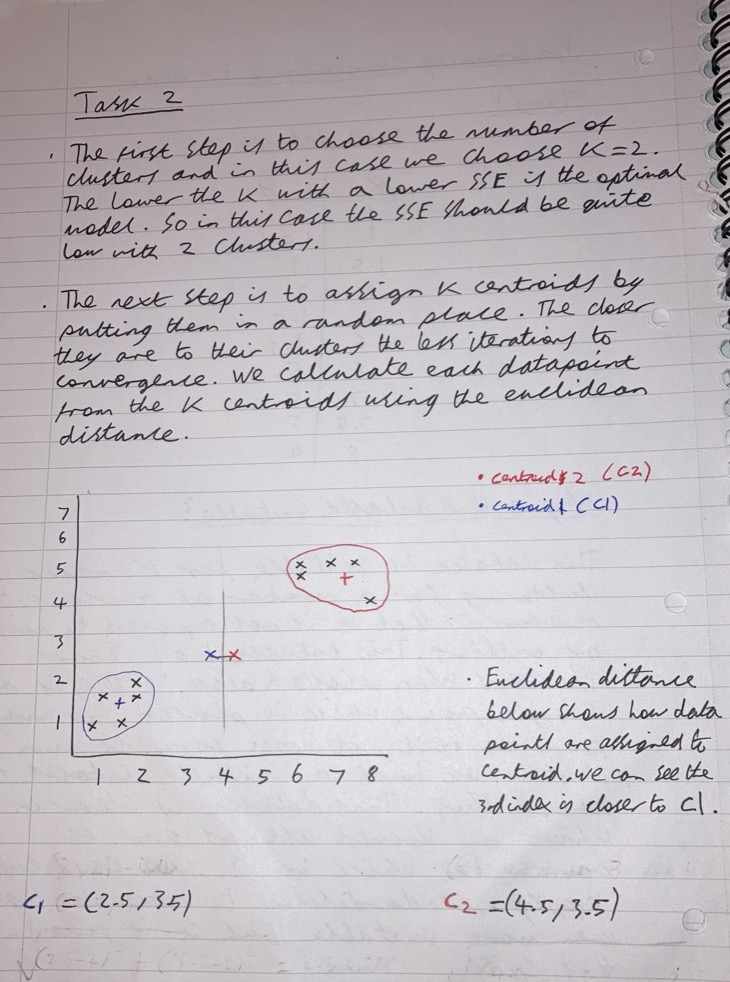

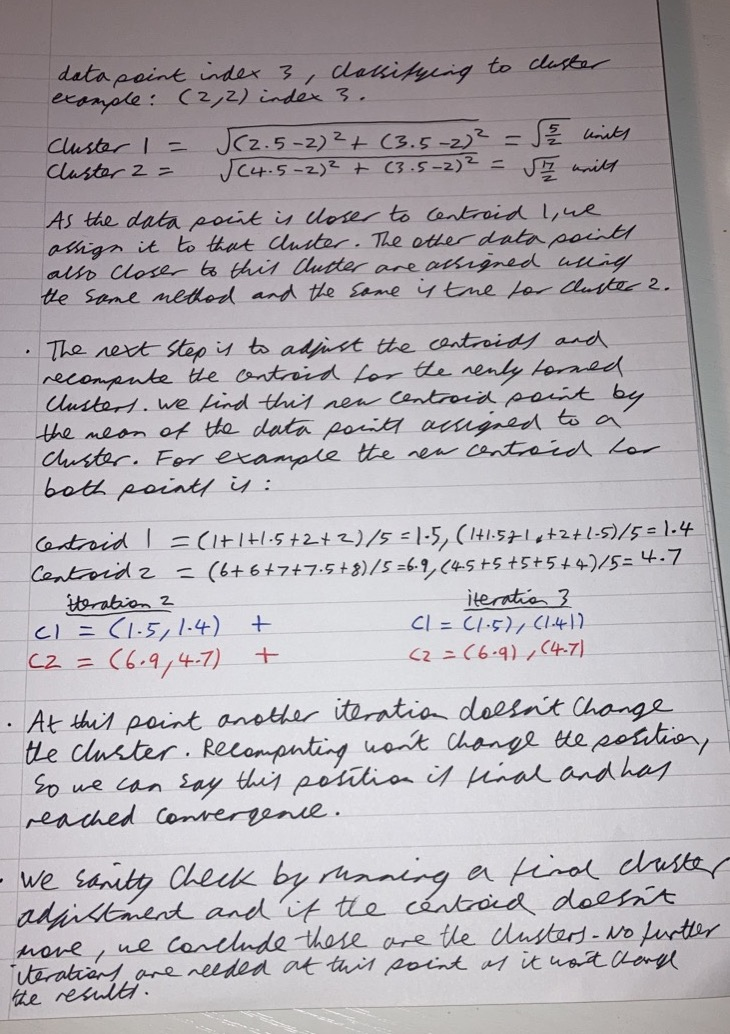

### Sanity Check

To further the sanity check we can run the centroid adjustment multiple times to check that the centroids don't change. This will verify and make sure our final values are precise. To conduct this sanity check we ran the centroid adjustment 30 more times and the position remained unchanged. No further iterations were needed to seperate the data points into clusters as they have reached convergence and we have sanity checked our result was correct using the k means classifier from python.

In [5]:
a = np.array([1,1,1.5,2,2,6,6,7,7.5,8],ndmin=2).T
b = np.array([1,1.5,1,2,1.5,4.5,5,5,5,4],ndmin=2).T

c = np.column_stack([a,b])
c = pd.DataFrame(c)

kmeans1 = KMeans(n_clusters=2,max_iter=31)
kmeans1.fit_predict(c[[0,1]])

print('Centroid plots =\n',kmeans1.cluster_centers_,'\n')
print('Classified data points = \n', kmeans1.labels_ )

Centroid plots =
 [[1.5 1.4]
 [6.9 4.7]] 

Classified data points = 
 [0 0 0 0 0 1 1 1 1 1]


## Task 3: Create a test harness
Start preparing your implementation by first setting up a test (without having an implementation just yet!). In this way, you will follow a _test-driven development_ approach. As part of this work, you may choose to compare to a reference implementation, like the one shown in the below code example.
> Marking information: Up to 20 points: identify suitable unit tests and integration tests. Explain what coverage you expect your test suite to have.

### Unit tests

* A unit test is a test written by the programmer to verify that a relatively small piece of code is doing what it is intended to do. They should be easy to write and execute, and their effectiveness depends on what the programmer considers to be useful. 

* We write unit tests to make sure our own libraries work as intended, and then write integration tests to make sure our code plays nicely with other code you are making use of, for instance a library.

In [6]:
# Adding unit tests

def run_unit_tests():
    assert(len(myCentroids)==len(kmeans.cluster_centers_))
    assert(len(myLabels)==len(kmeans.labels_))
    assert(all(i <= 2 for i in myLabels))
    assert(type(myLabels) == np.ndarray)

run_unit_tests()

### Integeration test

* Integration tests tell what's not working. But they are of no use in guessing where the problem could be.

* An integration test is done when the tested object or module is working like it should be, with other bits of code. A unit test tests code that you have complete control over whereas an integration test tests how your code uses or "integrates" with some other code.

In [7]:
#Centroids and Labels from Sk-Learn library

def run_integration_test():
    kmeans = KMeans(n_clusters=3)
    kmeans.fit_predict(iris[['petal length (cm)','petal width (cm)']])
    
    assert(isinstance(iris[['petal length (cm)','petal width (cm)']],(pd.DataFrame,np.ndarray)))
    assert(len(iris[['petal length (cm)','petal width (cm)']])) == 150
    assert(type(kmeans.fit_predict(iris[['petal length (cm)','petal width (cm)']]))) == np.ndarray
    assert(len(kmeans.fit_predict(iris[['petal length (cm)','petal width (cm)']]))) == 150
    assert(len(myCentroids)==len(kmeans.cluster_centers_))
    assert(len(myLabels)==len(kmeans.labels_))
    assert(all(i <= 2 for i in myLabels))
    assert(type(myLabels) == np.ndarray)

run_integration_test()

Centroid plots =
 [[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]] 

Classified data points = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


### Comparing results to reference implementation

The aim of this test harness was to check if our code and reference implementation works. As the code has passed with no assertion errors, we can assume the code works normally. We now have a reference implementation to compare our results to and to make sure our algorithm from scratch is working properly. We have tested the implementation works properly and after we implement our own k means clustering algorithm, we can compare our results and we can also sanity check by using the same parameters and putting them into the test algorithm used in this test harness. 

In [25]:
#Comparison
#Centroids and Labels from Sk-Learn library

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(iris[['petal length (cm)','petal width (cm)']])

print('Centroid plots =\n',kmeans.cluster_centers_,'\n')
print('Classified data points = \n', kmeans.labels_ )

Centroid plots =
 [[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]] 

Classified data points = 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
#Centroids and Labels from my own implementation

myCentroids = np.asarray([Centroids[0,:],Centroids[1,:]])
myCentroids = myCentroids.T
myCentroids[[1, 0], :] = myCentroids[[0, 1], :]

d = {2 : 0, 1 : 1, 3 : 2}
u,inv = np.unique(C,return_inverse = True)
myLabels = np.array([d[x] for x in u])[inv].reshape(C.shape)

print('Centroid plots =\n', myCentroids,'\n')
print('Classified data points = \n', myLabels)

assert(len(myCentroids==len(kmeans.cluster_centers_)))
assert(len(myLabels==len(kmeans.labels_)))
assert(all(i <= 2 for i in myLabels))

### What coverage do we expect our test suite to have?

A test suite is a collection of test cases, test suites, or both. It is used to aggregate tests that should be executed together. In simple terms, it is a technique to ensure that your tests are testing your code or how much of your code you exercised by running the test.

Test coverage is a measure (in percent) of the degree to which the source code of a program is executed when a particular test suite is run. A program with high test coverage has more of its source code executed during testing, which suggests it has a lower chance of containing undetected software bugs compared to a program with low test coverage.

To measure what percentage of code has been executed by a test suite, one or more coverage criteria are used. These are usually defined as rules or requirements, which a test suite must satisfy.

The expected test coverage for this test suite would be total lines of unit test and integration test code divided by the total lines of code for the program. We expect our test suite to have 24 / 110. Test suite coverage = 22%. We expect all of the code for the implementation to be covered

#### Limitations

One of the limitations of testing k means clustering method is that it is difficult to test because k means is stochastic and if we do not start the centroids in the same place and make everything run exactly the same, the same results would not be generated.

The best method we can use is to test with a well known dataset (iris) and we will compare our results from this test suite to the implementation to see if they are in the same range, as they will not be exactly the same values but should be similar to conclude our implementation works and with no bugs

## Task 4: Implement k-means clustering in Python
You are now set to actually add the implementation. Note that you are expected to fully implement the mathematical operations instead of using a library function such as `scikit` or `statsmodels`. Your implementation may make several assumptions about the inputs provided to it. Make those explicit in comments. Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.
> Marking information: Up to 50 points: 30 points for a correctly working Python implementation, 10 points for describing limitations and assumptions of your implementation, and 10 points for a description of the complexity of your algorithm.

In [8]:
start = timer()

Limitations are commented throughout the implementation

### Step 1: Choose the number of iterations 

We are assuming here that 100 iterations is enough until convergence. We pick a number large enough to gurantee convergence, however we can not be sure we will be correct. We need to find the optimum number of iterations to convergence as there is no need to do 10000 iterations if they reach there convergence point at 100 iterations. We will waste computational memory if we keep iterating after convergence and the result will be the exact same at convergence. The best K means classifier is the one which has the lowest amount of error for the lowest K.

In [9]:
m=iris.shape[0] #number of training examples
n=iris.shape[1] #number of features. Here n=2
n_iter=100

### Step 2: Choose the number of clusters K

A limitation here is that we are only running our k means clustering once so only choose one value of K. Usually we would run this on a range of values for K and this would allow us to use the elbow method later on to identify the best k means clustering algorithm as using less K is better as this is a quality metric alongside the error.

In [10]:
X = iris.values
K = 3

### Step 3: Initialise the centroids randomly from the data points

Dependent on our starting point of our random centroids, poor initialisation can lead to increased numbers of required clustering iterations to reach convergence, a greater overall runtime, and a less-efficient algorithm overall.

In [11]:
import random as rd

Centroids=np.array([]).reshape(n,0) 

In [12]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

### Step 4: Classify each datapoint using the euclidean distance to identify its closest centroid 

We may not reach convergence in the specified number of iterations if the random initialisation is poor. This is a limitation of our implementation and it may be better to use the k means ++ method.

This is expected as we will be using random initialisation for our initial centroid points. This can be avoided through methods such as k means ++ which the sk learn method uses as a default.

In [13]:
Output={}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

### Step 5: Adjust the centroids by computing the mean of  assigned data points and plot the new centroids 

In [14]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

### Step 6: Iterate previous step until the specified number (100) or until centroids reach convergence

We may not reach convergence with our specified number of iterations due to the randomised initialisation. But we may also iterate too much, as for example 100 iterations is a estimate of how long it should be to gurantee convergence but this could still waste resources if way over the iterations required for convergence.

In [27]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1

Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
    Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

In [18]:
end = timer()
print(end - start)
print(timedelta(seconds=end-start))

0.12829528199999984
0:00:00.128295


### Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.

The execution of my algorithm above should take approximately 0.13 seconds due to there being 150 datapoints and 3 clusters. The execution time may vary dependent on the initial centroids positions so we provide an estimate of how long the algorithm can take dependent on our input values.

The estimate of my algorithm execution algorithm above was estimated as 0.13 seconds. This estimate as a function of the inputs k = 3 and 150 data points can also be expressed as 0.043 seconds per cluster or 0.00087 seconds per data point

## Optional Task 5: Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.
> Marking information: Up to 20 _bonus_ points: if you choose to complete this _optional_ task, you may be able to recover marks lost elsewhere.

### Depicting inputs of data points = 150 and k clusters = 3

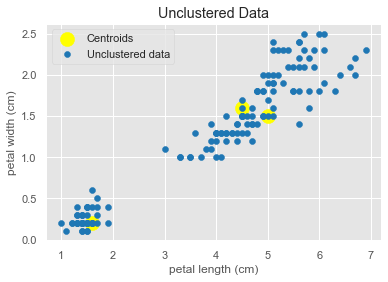

In [19]:
### Unclustered Data initial centroids
# Visualising the centroids
# Visualising the data points

K1 = 3
random_centroids = (iris.sample(K1))

plt.scatter(random_centroids["petal length (cm)"],random_centroids["petal width (cm)"],
            s=200,c='yellow',label='Centroids')
plt.scatter(iris["petal length (cm)"],iris["petal width (cm)"],c='tab:blue',label='Unclustered data')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Unclustered Data')
plt.legend()
plt.show()

### Results of k-means clustering applied to datapoints = 150 and k cluster = 3, inputs.

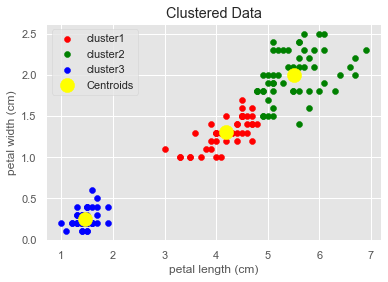

In [20]:
# Clustered Data at convergence
# Visualising the clustered data

color=['red','green','blue']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Clustered Data')
plt.legend()
plt.show()